In [3]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import json
import numpy as np

DIR = "data/"
THRESHOLD = 50
existingCourses = []
gradeRange = []
courseData = []

In [4]:
with open(f"{DIR}courseList.txt", "r") as f:
    data = f.read()
    data = data.split(",\n")
    data = data[:-1]
    for item in data:
        existingCourses.append(json.loads(item)['code'])

In [5]:
tmp = []
for course in existingCourses:
    if os.path.isfile(f"{DIR}results/{course}.csv"):
        with open(f"{DIR}results/{course}.csv", "r") as f:
            data = f.read()
            data = data.split("\n")
            if len(data) > 2:
                tmp.append([course, len(data)])
tmp.sort(key=lambda x:x[1])

increment = -100

for item in tmp: 
    last = item[1]
    if ((item[1] > increment) and (item[1] <= increment + 10)):
        if item[1] < 2: continue
        courseData[-1]+=1
    else:
        increment = round(item[1]/10)*10
        if increment + 5 not in gradeRange:
            gradeRange.append(increment + 5)
            courseData.append(1)

for i in range(len(courseData)):
    courseData[i] = 1/courseData[i]

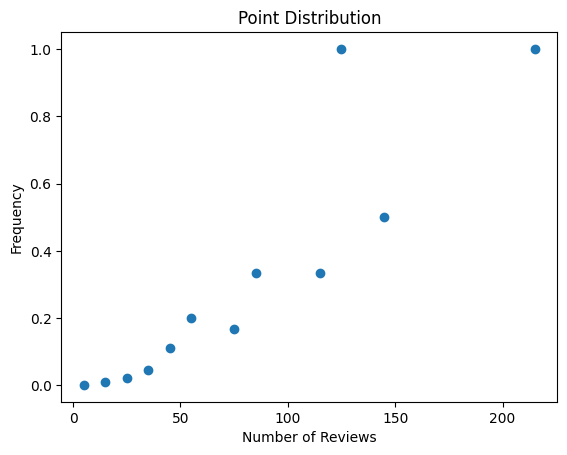

In [6]:
plt.title("Point Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.scatter(gradeRange, courseData)

m:0.005141017803714057 c-0.09244230650551835


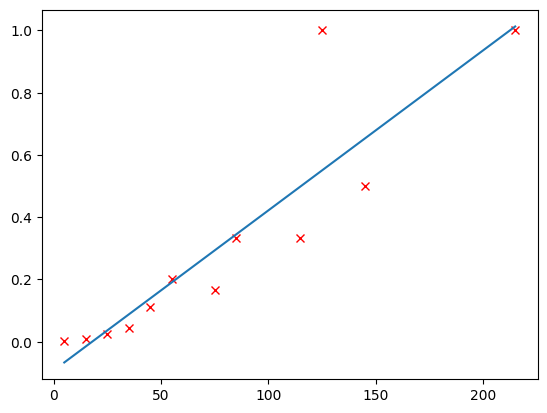

In [7]:
xData = np.array(gradeRange)
yData = np.array(courseData)
mergedData = []

for i in range(len(courseData)):
    mergedData.append([gradeRange[i], courseData[i]])

B = np.ones(len(xData))
A = np.stack([xData, B]).T

m, c = np.linalg.lstsq(A, yData, rcond=None)[0]
print("m:" + str(m), "c" + str(c))
yNew = m*xData + c

plt.figure()
figure3 = plt.plot(xData, yData, 'rx', label = 'Training Data')
figure4 = plt.plot(xData, yNew, label="Numpy Linear Regression")


In [8]:
sortedCourseData = []
for course in existingCourses:
    coursePopularity = []
    coursePopularity.append(course)
    PATH = f"{DIR}results/{course}.csv"
    if os.path.isfile(PATH):
        df = pd.read_csv(PATH)
        weighted_mean = 0
        if not df.empty:
            mean = df["roberta_pos"].mean()
            factor = m*len(df)
            weighted_mean = factor * mean
    coursePopularity.append(weighted_mean)
    sortedCourseData.append(coursePopularity)

sortedCourseData.sort(key=lambda x:x[1])
sortedCourseData = sortedCourseData[::-1]


In [9]:
rawData = {}
modelledData = []

with open(f"{DIR}grades.txt", "r") as f:
    data = f.read()
    data = data.split(",\n")
    data = data[:-1]
    for item in data:
        rawData[json.loads(item)["code"]] = json.loads(item)

for courseData in sortedCourseData:
    modelledData.append(rawData[courseData[0]])

with open(f"{DIR}sortedReviews.txt", "w") as f:
    for item in modelledData:
        f.write(json.dumps(item)+",\n")
        print("Course added: " + str(item["code"]))

Course added: CCCH9005
Course added: CCCH9001
Course added: CCST9017
Course added: ECON1210
Course added: ACCT1101
Course added: FINA1310
Course added: CUND9003
Course added: CCST9003
Course added: ECON1220
Course added: CCHU9014
Course added: CCHU9062
Course added: FINA2322
Course added: CCCH9007
Course added: CAES1000
Course added: CCCH9044
Course added: FINA2320
Course added: CCST9027
Course added: CCHU9018
Course added: MATH1013
Course added: CCHU9075
Course added: CCCH9051
Course added: CCCH9017
Course added: ECON2210
Course added: CCHU9069
Course added: CCHU9021
Course added: CCGL9042
Course added: CCST9049
Course added: COMP1117
Course added: MATH1009
Course added: ECON2220
Course added: MATH2101
Course added: ACCT2102
Course added: CCHU9045
Course added: MATH2014
Course added: STAT1603
Course added: CCHU9039
Course added: CCHU9070
Course added: IIMT2601
Course added: COMP2121
Course added: MATH2012
Course added: FINA2330
Course added: STAT2601
Course added: CCGL9025
Course adde